In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
print(train.shape)
print(test.shape)

(400000, 19)
(100000, 18)


In [4]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


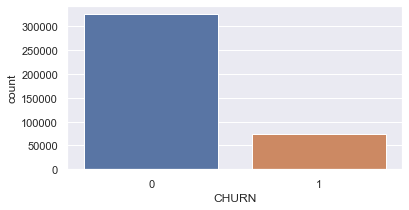

In [5]:
#Checking target 'CHURN' distribution
plt.figure(figsize=(6,3))
sns.countplot(x='CHURN',data=train)
plt.show()

In [6]:
# Percentage Churn
train['CHURN'].value_counts(normalize = True) * 100 

0    81.289
1    18.711
Name: CHURN, dtype: float64

In [7]:
variable_definition = pd.read_csv('VariableDefinitions.csv')
variable_definition

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [8]:
train.info()
print('_'*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         400000 non-null  object 
 1   REGION          242480 non-null  object 
 2   TENURE          400000 non-null  object 
 3   MONTANT         259723 non-null  float64
 4   FREQUENCE_RECH  259723 non-null  float64
 5   REVENUE         265337 non-null  float64
 6   ARPU_SEGMENT    265337 non-null  float64
 7   FREQUENCE       265337 non-null  float64
 8   DATA_VOLUME     203146 non-null  float64
 9   ON_NET          254181 non-null  float64
 10  ORANGE          233683 non-null  float64
 11  TIGO            160614 non-null  float64
 12  ZONE1           31690 non-null   float64
 13  ZONE2           25513 non-null   float64
 14  MRG             400000 non-null  object 
 15  REGULARITY      400000 non-null  int64  
 16  TOP_PACK        232671 non-null  object 
 17  FREQ_TOP_P

In [9]:
train.describe(include='all')

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
count,400000,242480,400000,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000,400000.000000,232671,232671.000000,400000.00000
unique,400000,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,111,NaN,NaN
top,dace6f02616e272b66cc40b9630eed55d0a29531,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN,NaN
freq,1,95517,379439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,400000,NaN,58675,NaN,NaN
mean,NaN,NaN,NaN,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,NaN,28.046502,NaN,9.254209,0.18711
std,NaN,NaN,NaN,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,NaN,22.282773,NaN,12.305563,0.39000
min,NaN,NaN,NaN,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,0.00000
25%,NaN,NaN,NaN,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,NaN,6.000000,NaN,2.000000,0.00000
50%,NaN,NaN,NaN,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,NaN,24.000000,NaN,5.000000,0.00000
75%,NaN,NaN,NaN,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,NaN,51.000000,NaN,12.000000,0.00000


In [61]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,test
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,2,NaN,NaN,test
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,27,"Data: 100 F=40MB,24H",17.0,test
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,46,IVR Echat_Daily_50F,3.0,test
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,61,All-net 500F=2000F;5d,65.0,test


In [10]:
test.describe(include='all')

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
count,100000,60707,100000,65049.000000,65049.000000,66510.000000,66510.000000,66510.000000,50662.000000,63617.000000,58800.000000,40212.000000,7680.000000,6422.000000,100000,100000.000000,58297,58297.000000
unique,100000,14,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,92,NaN
top,6d8aad062b6847a792b5cf3d7e5a5e5e828ea004,DAKAR,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN,All-net 500F=2000F;5d,NaN
freq,1,23998,94825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100000,NaN,14916,NaN
mean,NaN,NaN,NaN,5545.613630,11.545051,5518.341663,1839.453676,13.979973,3357.428033,279.370703,94.900799,23.459291,8.373307,7.678138,NaN,28.122430,NaN,9.276035
std,NaN,NaN,NaN,7123.955226,13.271270,7177.840304,2392.609422,14.655983,10515.256185,870.773904,201.962296,66.932661,40.822161,32.259672,NaN,22.324101,NaN,12.369808
min,NaN,NaN,NaN,25.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000
25%,NaN,NaN,NaN,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,NaN,6.000000,NaN,2.000000
50%,NaN,NaN,NaN,3000.000000,7.000000,3000.000000,1000.000000,9.000000,268.000000,27.000000,28.000000,6.000000,1.000000,2.000000,NaN,24.000000,NaN,5.000000
75%,NaN,NaN,NaN,7400.000000,16.000000,7399.000000,2466.000000,20.000000,2923.000000,157.000000,99.000000,20.000000,4.000000,5.000000,NaN,51.000000,NaN,12.000000


In [11]:
# ZONE1 and ZONE2 contains many missing values over 90%, so they'll be dropped
# MRG has only one unique value, so it will be dropped
train.drop(['ZONE1', 'ZONE2','MRG'], axis = 1, inplace = True)
test.drop(['ZONE1', 'ZONE2', 'MRG'], axis = 1, inplace = True)

### Missing value treatment

In [12]:
test['CHURN'] = 'test' #for easy separation

# Combine train and test to avoid repetition
combine = pd.concat([train, test]).reset_index(drop=True)

In [13]:
train.shape, test.shape, combine.shape

((400000, 16), (100000, 16), (500000, 16))

In [14]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,test
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,2,NaN,NaN,test
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,27,"Data: 100 F=40MB,24H",17.0,test
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,46,IVR Echat_Daily_50F,3.0,test
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,61,All-net 500F=2000F;5d,65.0,test


In [15]:
combine.isnull().sum()

user_id                0
REGION            196813
TENURE                 0
MONTANT           175228
FREQUENCE_RECH    175228
REVENUE           168153
ARPU_SEGMENT      168153
FREQUENCE         168153
DATA_VOLUME       246192
ON_NET            182202
ORANGE            207517
TIGO              299174
REGULARITY             0
TOP_PACK          209032
FREQ_TOP_PACK     209032
CHURN                  0
dtype: int64

In [16]:
missing_col = combine.columns[combine.isna().any()]
missing_col

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'TOP_PACK',
       'FREQ_TOP_PACK'],
      dtype='object')

In [17]:
#Identifying the missing categorial and numerical variable
df_cat_missing = []
df_num_missing = []
for col in missing_col:
    if combine[col].dtype == 'object':
        df_cat_missing.append(col)
    else:
        df_num_missing.append(col)
print(df_cat_missing) # missing cat features
print(df_num_missing) # missing num features

['REGION', 'TOP_PACK']
['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK']


In [18]:
# filling NaN values in numeric features
# median is more resitant to outliers
for col in df_num_missing:
    
    combine[col].fillna(combine[col].median(), inplace = True)

In [19]:
combine.isnull().sum()

user_id                0
REGION            196813
TENURE                 0
MONTANT                0
FREQUENCE_RECH         0
REVENUE                0
ARPU_SEGMENT           0
FREQUENCE              0
DATA_VOLUME            0
ON_NET                 0
ORANGE                 0
TIGO                   0
REGULARITY             0
TOP_PACK          209032
FREQ_TOP_PACK          0
CHURN                  0
dtype: int64

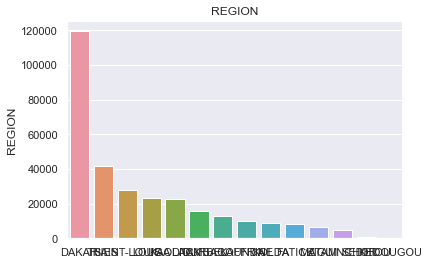

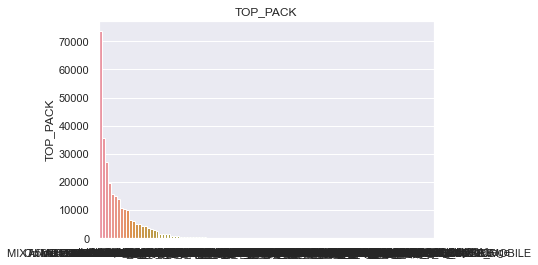

In [20]:
for i in df_cat_missing:
    sns.barplot(combine[i].value_counts().index,combine[i].value_counts()).set_title(i)
    plt.show()

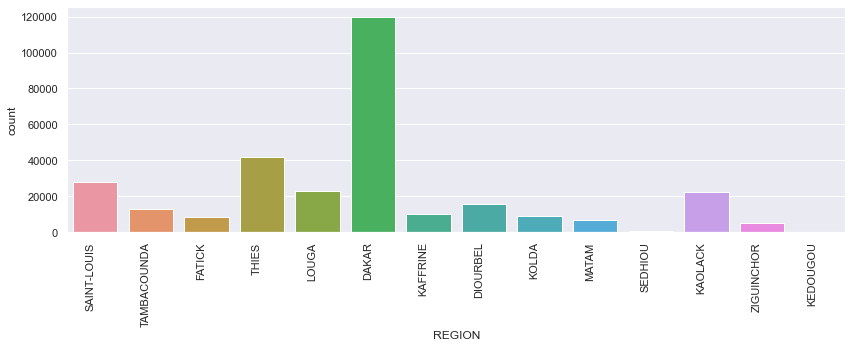

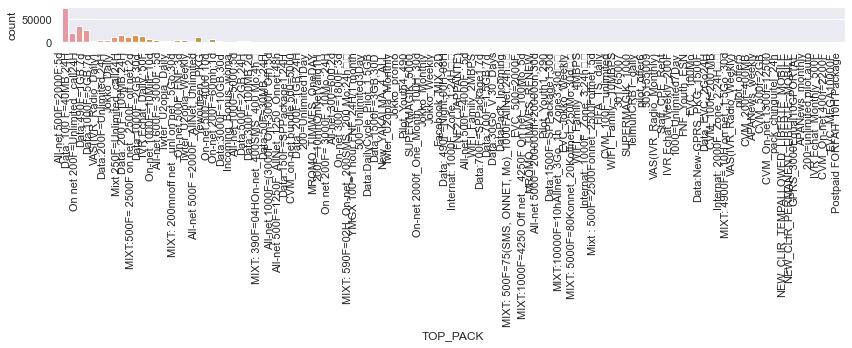

In [21]:
for i in df_cat_missing:
    plt.figure(figsize=(12,5))
    g = sns.countplot(x=i,data=combine)
    g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
    plt.tight_layout()
    plt.show()

In [22]:
combine['REGION'].value_counts()

DAKAR          119515
THIES           41675
SAINT-LOUIS     27782
LOUGA           23129
KAOLACK         22584
DIOURBEL        15617
TAMBACOUNDA     12869
KAFFRINE        10121
KOLDA            8979
FATICK           8294
MATAM            6666
ZIGUINCHOR       5018
SEDHIOU           715
KEDOUGOU          223
Name: REGION, dtype: int64

In [23]:
combine['TOP_PACK'].value_counts()

All-net 500F=2000F;5d             73591
On net 200F=Unlimited _call24H    35672
Data:490F=1GB,7d                  27084
Data: 100 F=40MB,24H              19468
Mixt 250F=Unlimited_call24H       15859
                                  ...  
CVM_100F_unlimited                    1
APANews_weekly                        1
EVC_MEGA10000F                        1
Postpaid FORFAIT 10H Package          1
CVM_On-net 400f=2200F                 1
Name: TOP_PACK, Length: 112, dtype: int64

## Correlation by data visualisation

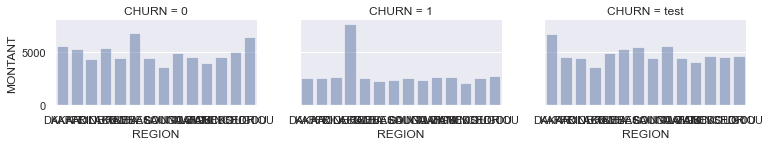

In [24]:
grid = sns.FacetGrid(combine, col='CHURN', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'REGION', 'MONTANT', alpha=.5, ci=None)
grid.add_legend()

In [25]:
# filling NaN values in numeric features
for col in df_cat_missing:
    combine[col].fillna(col +'_NAN',inplace = True)
#this is done to avoid concentration on one particular region (or noise)

In [26]:
combine.isnull().sum()

user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [27]:
train.isnull().sum()

user_id                0
REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

### Encode Categorical Features


In [28]:
df_cat = combine.select_dtypes(exclude=np.number).columns.drop('CHURN')
df_cat

Index(['user_id', 'REGION', 'TENURE', 'TOP_PACK'], dtype='object')

In [29]:
combine.drop(['user_id'], axis = 1, inplace = True)

In [30]:
for col in df_cat:
    print(col + " has " + str(combine[col].nunique()) +" unique categories")

KeyError: 'user_id'

In [31]:
# One-hot encoding for 'REGION' and 'TENURE'
# while Label encoding for 'TOP_PACK' 
combine = pd.get_dummies(columns= ['REGION', 'TENURE'], data = combine)

In [32]:
combine.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_THIES,REGION_ZIGUINCHOR,TENURE_D 3-6 month,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,17000.0,32.0,18000.0,6000.0,34.0,267.0,97.0,355.0,6.0,62,...,0,0,0,0,0,0,0,0,0,1
1,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,...,0,0,0,0,0,0,0,0,0,1
2,1500.0,3.0,1500.0,500.0,3.0,267.0,30.0,30.0,6.0,32,...,0,0,0,0,0,0,0,0,0,1
3,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,...,0,0,0,0,0,0,0,0,0,1
4,3000.0,7.0,498.0,166.0,3.0,1.0,1.0,3.0,6.0,50,...,0,0,0,0,0,0,0,0,0,1


In [33]:
#Label encoding
combine['TOP_PACK']  = pd.factorize(combine['TOP_PACK'])[0]

In [34]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   MONTANT               500000 non-null  float64
 1   FREQUENCE_RECH        500000 non-null  float64
 2   REVENUE               500000 non-null  float64
 3   ARPU_SEGMENT          500000 non-null  float64
 4   FREQUENCE             500000 non-null  float64
 5   DATA_VOLUME           500000 non-null  float64
 6   ON_NET                500000 non-null  float64
 7   ORANGE                500000 non-null  float64
 8   TIGO                  500000 non-null  float64
 9   REGULARITY            500000 non-null  int64  
 10  TOP_PACK              500000 non-null  int64  
 11  FREQ_TOP_PACK         500000 non-null  float64
 12  CHURN                 500000 non-null  object 
 13  REGION_DAKAR          500000 non-null  uint8  
 14  REGION_DIOURBEL       500000 non-null  uint8  
 15  

In [246]:
train_df = combine.loc[( combine['CHURN'] != 'test')].reset_index(drop = True)
test_df = combine.loc[( combine['CHURN'] == 'test')].reset_index(drop = True)

In [247]:
train_df.shape, test_df.shape

((400000, 36), (100000, 36))

In [77]:
train_df.shape

(400000, 36)

### Dealing with outliers

In [38]:
df_num = combine.select_dtypes(include=np.number).columns
df_num

Index(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK', 'REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK',
       'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month',
       'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month'],
      dtype='object')

In [39]:
col = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'TOP_PACK',
       'FREQ_TOP_PACK']

<AxesSubplot:xlabel='MONTANT'>

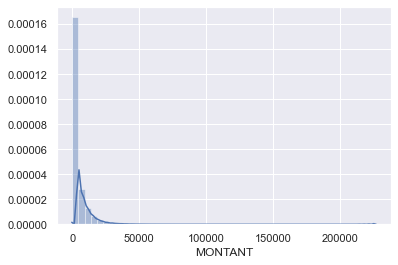

In [40]:
sns.distplot(train_df['MONTANT'])

In [81]:
train_df['MONTANT'].value_counts()

3000.0     146758
500.0       21173
1000.0      15519
1500.0       8976
2000.0       8566
            ...  
3210.0          1
46350.0         1
15065.0         1
11598.0         1
4096.0          1
Name: MONTANT, Length: 2421, dtype: int64

In [41]:
# Let's declare a variable that will be equal to the 99th percentile of the 'MONTANT' variable
q = train_df['MONTANT'].quantile(0.99)
# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'MONTANT'
data_1 = train_df[train_df['MONTANT']<q]
# In this way we have essentially removed the top 1% of the data about 'MONTANT'
data_1.describe(include='all')

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_THIES,REGION_ZIGUINCHOR,TENURE_D 3-6 month,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
count,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,...,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000,395986.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4280.567906,9.479631,4307.707719,1435.906052,11.835027,1709.671711,174.765113,60.129734,11.535130,27.720621,...,0.083228,0.009985,0.000374,0.000879,0.004429,0.006993,0.012185,0.020826,0.005836,0.948478
std,4427.023149,9.801270,4595.592591,1531.860609,11.245820,7023.280259,668.307374,115.975993,30.590772,22.150462,...,0.276226,0.099426,0.019329,0.029632,0.066407,0.083329,0.109710,0.142803,0.076171,0.221060
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,4.000000,1850.000000,617.000000,6.000000,238.000000,12.000000,20.000000,6.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3000.000000,7.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4500.000000,9.000000,4500.000000,1500.000000,13.000000,280.000000,51.000000,38.000000,6.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='FREQUENCE_RECH'>

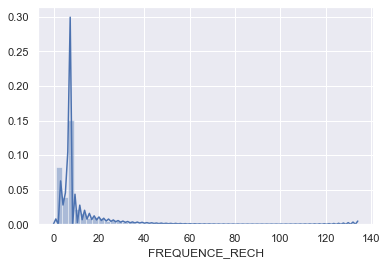

In [43]:
sns.distplot(train_df['FREQUENCE_RECH'])

## Another approcah for Normalisation

<AxesSubplot:xlabel='ARPU_SEGMENT'>

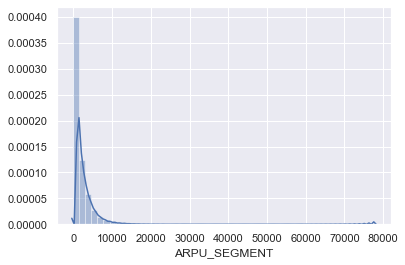

In [161]:
# The  log transformation will be used to normalise the features
sns.distplot(train['ARPU_SEGMENT']) #before normalisation

<AxesSubplot:xlabel='TENURE_F 9-12 month'>

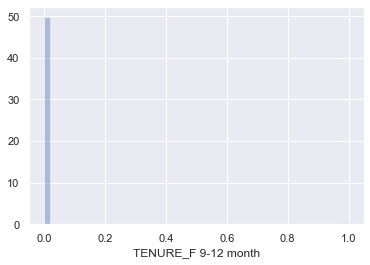

In [157]:
sns.distplot(combine['TENURE_F 9-12 month']) #before normalisation

Text(0.5, 1.0, 'Transformation of MONTANT')

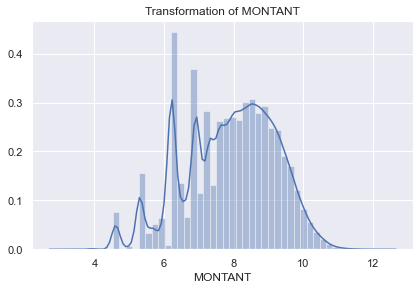

In [86]:
sns.distplot(np.log1p(train['MONTANT']))
plt.tight_layout()
plt.title("Transformation of MONTANT")

In [87]:
from scipy.stats import skew,norm  # for some statistics

In [94]:
#Identifying the numerical variable to be skewed
skew_col = []
for col in train.columns.values:
    if train[col].dtype != 'object':
        skew_col.append(col)
skew_col

['MONTANT',
 'FREQUENCE_RECH',
 'REVENUE',
 'ARPU_SEGMENT',
 'FREQUENCE',
 'DATA_VOLUME',
 'ON_NET',
 'ORANGE',
 'TIGO',
 'REGULARITY',
 'FREQ_TOP_PACK',
 'CHURN']

In [100]:
# Next time this should be done before encoding
numeric = combine.select_dtypes(include='number').columns
skew_features = combine[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features

There are 32 numerical features with Skew > 0.5 :


TENURE_D 3-6 month      50.869185
REGION_KEDOUGOU         47.319688
DATA_VOLUME             35.821392
TENURE_E 6-9 month      33.513087
REGION_SEDHIOU          26.387537
TIGO                    18.477329
TENURE_F 9-12 month     14.924412
TENURE_J 21-24 month    13.011564
TENURE_G 12-15 month    11.847179
ON_NET                  10.388552
REGION_ZIGUINCHOR        9.831146
ORANGE                   9.292464
TENURE_H 15-18 month     8.910566
REGION_MATAM             8.486519
REGION_FATICK            7.569770
REGION_KOLDA             7.259737
REGION_KAFFRINE          6.813435
TENURE_I 18-21 month     6.706931
REGION_TAMBACOUNDA       5.989948
FREQ_TOP_PACK            5.672962
REGION_DIOURBEL          5.389678
MONTANT                  4.991447
ARPU_SEGMENT             4.668335
REVENUE                  4.668321
REGION_KAOLACK           4.380282
REGION_LOUGA             4.320461
REGION_SAINT-LOUIS       3.880219
TOP_PACK                 3.688105
REGION_THIES             3.014719
FREQUENCE_RECH

In [101]:
skew_column = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'FREQ_TOP_PACK']

In [162]:
train.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,50,NaN,NaN,0


In [163]:
combine.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_THIES,REGION_ZIGUINCHOR,TENURE_D 3-6 month,TENURE_E 6-9 month,TENURE_F 9-12 month,TENURE_G 12-15 month,TENURE_H 15-18 month,TENURE_I 18-21 month,TENURE_J 21-24 month,TENURE_K > 24 month
0,9.741027,3.496508,9.798183,8.699681,3.555348,5.590987,4.584967,5.874931,1.945910,62,...,0,0,0,0,0,0,0,0,0,1
1,8.366603,3.401197,8.395703,7.297768,3.637586,7.475906,2.197225,1.386294,0.000000,40,...,0,0,0,0,0,0,0,0,0,1
2,7.313887,1.386294,7.313887,6.216606,1.386294,5.590987,3.433987,3.433987,1.945910,32,...,0,0,0,0,0,0,0,0,0,1
3,7.313887,1.386294,7.823246,6.725034,1.609438,0.000000,5.075174,3.828641,2.995732,18,...,0,0,0,0,0,0,0,0,0,1
4,8.006701,2.079442,6.212606,5.117994,1.386294,0.693147,0.693147,1.386294,1.945910,50,...,0,0,0,0,0,0,0,0,0,1


## Correlation Matrix with HeatMap

In [252]:
corr_matrix = train_df[skew_column].corr()
corr_matrix

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,FREQ_TOP_PACK
MONTANT,1.000000,0.872588,0.784342,0.793579,0.800287,0.215970,0.434836,0.559373,0.336327,0.683256
FREQUENCE_RECH,0.872588,1.000000,0.700483,0.708880,0.897308,0.178347,0.433702,0.493877,0.307327,0.821153
REVENUE,0.784342,0.700483,1.000000,0.999692,0.826793,0.194928,0.396074,0.509147,0.293328,0.579368
ARPU_SEGMENT,0.793579,0.708880,0.999692,1.000000,0.832072,0.197032,0.400093,0.514593,0.296751,0.586707
FREQUENCE,0.800287,0.897308,0.826793,0.832072,1.000000,0.198730,0.396247,0.457250,0.272376,0.783780
DATA_VOLUME,0.215970,0.178347,0.194928,0.197032,0.198730,1.000000,-0.074297,-0.025779,-0.006808,0.131282
ON_NET,0.434836,0.433702,0.396074,0.400093,0.396247,-0.074297,1.000000,0.465069,0.303007,0.396400
ORANGE,0.559373,0.493877,0.509147,0.514593,0.457250,-0.025779,0.465069,1.000000,0.386055,0.459211
TIGO,0.336327,0.307327,0.293328,0.296751,0.272376,-0.006808,0.303007,0.386055,1.000000,0.323260
FREQ_TOP_PACK,0.683256,0.821153,0.579368,0.586707,0.783780,0.131282,0.396400,0.459211,0.323260,1.000000


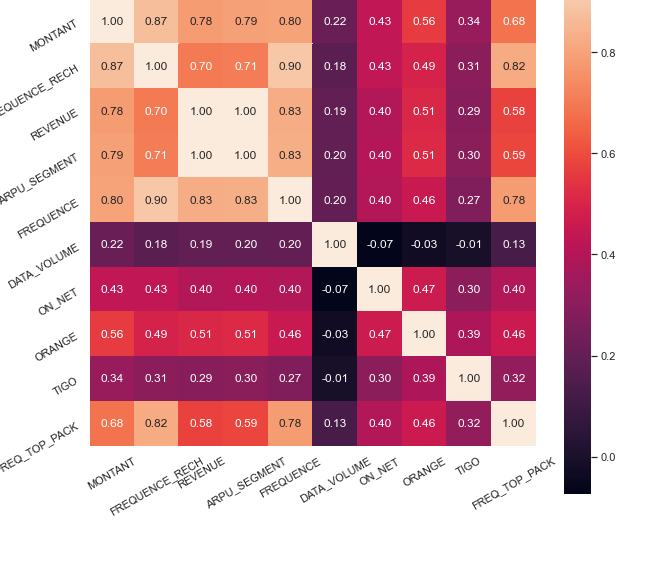

In [253]:
# Create correlation heatmap
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap of Customers')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [153]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,FREQ_TOP_PACK
MONTANT,NaN,0.872401,0.783826,0.793015,0.800281,0.215306,0.434435,0.560277,0.336929,0.683365
FREQUENCE_RECH,NaN,NaN,0.699970,0.708319,0.897389,0.177022,0.432870,0.494361,0.307842,0.821390
REVENUE,NaN,NaN,NaN,0.999696,0.826866,0.193991,0.395413,0.510031,0.294129,0.579126
ARPU_SEGMENT,NaN,NaN,NaN,NaN,0.832107,0.196084,0.399422,0.515475,0.297539,0.586417
FREQUENCE,NaN,NaN,NaN,NaN,NaN,0.197608,0.395731,0.458133,0.273256,0.783669
DATA_VOLUME,NaN,NaN,NaN,NaN,NaN,NaN,-0.076207,-0.024820,-0.007614,0.130700
ON_NET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.466079,0.304016,0.395555
ORANGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.386796,0.459661
TIGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.324784
FREQ_TOP_PACK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [154]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

['ARPU_SEGMENT']


In [188]:
# Drop marked features
# Based on RandomForest Feature Importance, drop FREQUENCE_RECH insted
# Also because it has 0.9 correlation based on HeatMap Matrix
train_df.drop(['FREQUENCE_RECH'], axis = 1, inplace = True)
test_df.drop(['FREQUENCE_RECH'], axis = 1, inplace = True)

In [189]:
train_df.shape

(400000, 35)

In [180]:
test['CHURN'] = 'test' #for easy separation

# Combine 'TOP_PACK' for frequency enconding
combine['TOP_PACK'] = pd.concat([train['TOP_PACK'], test['TOP_PACK']]).reset_index(drop=True)

In [242]:
train_df_copy['CHURN'] = train_df['CHURN']
test_df_copy['CHURN'] = test_df['CHURN']

In [168]:
combine['TOP_PACK'].value_counts()

All-net 500F=2000F;5d             73591
On net 200F=Unlimited _call24H    35672
Data:490F=1GB,7d                  27084
Data: 100 F=40MB,24H              19468
Mixt 250F=Unlimited_call24H       15859
                                  ...  
CVM_100F_unlimited                    1
APANews_weekly                        1
EVC_MEGA10000F                        1
Postpaid FORFAIT 10H Package          1
CVM_On-net 400f=2200F                 1
Name: TOP_PACK, Length: 112, dtype: int64

### Frequency Encoding

In [184]:
fe = combine.groupby('TOP_PACK').size()/len(combine)
combine.loc[: , 'TOP_PACK'] = combine['TOP_PACK'].map(fe)

In [125]:
train_df.columns.values

array(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN', 'REGION_DAKAR',
       'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE',
       'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month',
       'TENURE_G 12-15 month', 'TENURE_H 15-18 month',
       'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month'], dtype=object)

### Correlation of 'FREQUENCE_RECH' with 'CHURN'

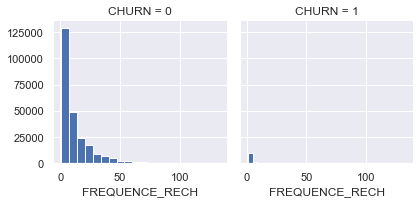

In [122]:
g = sns.FacetGrid(train, col='CHURN')
g.map(plt.hist, 'FREQUENCE_RECH', bins=20)
# Since 0 has the highest count, this goes to show that
# the telecom coy has many dummy customers who do not recharge
# Also, those with more than 0 recharge frequency did not churn

### Correlation of 'FREQUENCE' with 'CHURN'

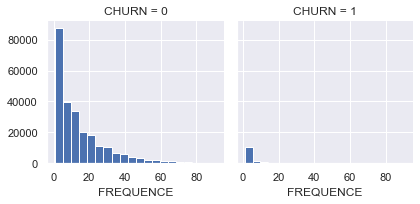

In [123]:
g = sns.FacetGrid(train, col='CHURN')
g.map(plt.hist, 'FREQUENCE', bins=20)
# None of the middle- and high-income earner churned
# this indicates a good customer service and quality
# provided by the coy

## VIF for multicollinearity

In [102]:
# Normalize skewed features using log transformation
for column in skew_column:
    combine[column] = np.log1p(combine[column])

In [183]:
combine.isnull().sum()

MONTANT                 0
FREQUENCE_RECH          0
REVENUE                 0
ARPU_SEGMENT            0
FREQUENCE               0
DATA_VOLUME             0
ON_NET                  0
ORANGE                  0
TIGO                    0
REGULARITY              0
TOP_PACK                0
FREQ_TOP_PACK           0
CHURN                   0
REGION_DAKAR            0
REGION_DIOURBEL         0
REGION_FATICK           0
REGION_KAFFRINE         0
REGION_KAOLACK          0
REGION_KEDOUGOU         0
REGION_KOLDA            0
REGION_LOUGA            0
REGION_MATAM            0
REGION_REGION_NAN       0
REGION_SAINT-LOUIS      0
REGION_SEDHIOU          0
REGION_TAMBACOUNDA      0
REGION_THIES            0
REGION_ZIGUINCHOR       0
TENURE_D 3-6 month      0
TENURE_E 6-9 month      0
TENURE_F 9-12 month     0
TENURE_G 12-15 month    0
TENURE_H 15-18 month    0
TENURE_I 18-21 month    0
TENURE_J 21-24 month    0
TENURE_K > 24 month     0
dtype: int64

## Baseline Model

In [273]:
X_train = train_df_cc.drop('CHURN', axis=1).copy()
Y_train = train_df_cc['CHURN'].apply(int).copy()
X_test  = test_df_cc.drop('CHURN', axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((400000, 30), (400000,), (100000, 30))

In [107]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred_lr = logreg.predict_proba(X_test)[:,1]
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

87.37

In [226]:
# Support Vector Machines

#svc = SVC()
#svc.fit(X_train, Y_train)
#Y_pred_svc = svc.predict_proba(X_test)[:,1]
#acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
#acc_svc 

# K-Nearest Neighbours Algorithm

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict_proba(X_test)[:,1]
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

In [106]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dtree = decision_tree.predict_proba(X_test)[:,1]
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

91.96

In [250]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_rforest = random_forest.predict_proba(X_test)[:,1]
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.96

In [269]:
# Gradient Boosting Classifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, Y_train)
Y_pred_gbm = gbm.predict_proba(X_test)[:,1]
acc_gbm = round(gbm.score(X_train, Y_train) * 100, 2)
acc_gbm

87.88

In [270]:
submission = pd.DataFrame({
        'user_id': test['user_id'],
        'CHURN': Y_pred_gbm
    })
submission.to_csv('expresso17.csv', index=False)

In [55]:
sample = pd.read_csv('sample_submission.csv')
sample

,user_id,CHURN
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,0
1,5335efd940280b82143272275637d1e65d37eadb,0
2,a581f4fa08677c26f83f643248c667e241043086,0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,0
...,...,...
99995,c6bcb3336795a18eb6c0bc7e19078a0704ef4d7e,0
99996,a44b4e44dc70115ed5bf971ebb4193dd536e87f0,0
99997,a2f84faffbc995bd0e2d726fa4ffdb93f11646ed,0
99998,afa76e894df4201fc77eb714de7d1f262299611a,0


In [59]:
test_df.columns.values

array(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN', 'REGION_DAKAR',
       'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE',
       'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month',
       'TENURE_G 12-15 month', 'TENURE_H 15-18 month',
       'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month'], dtype=object)

### Note: So far Gradient Boosting Classifier is the best predictor based on submission

In [ ]:
from sklearn import prepocessing
X = prepocessing.scale(X_train)
x_test = prepocessing.scale(X_test)

In [185]:
df_pf = pd.DataFrame(combine['TOP_PACK'], columns=['TOP_PACK'])
df_pf

,TOP_PACK
0,0.147182
1,0.038936
2,0.147182
3,0.071344
4,0.418064
...,...
499995,0.418064
499996,0.418064
499997,0.010164
499998,0.147182


## Feature Importance Plot

In [224]:
combine.shape

(500000, 36)

In [228]:
X = train_df.drop('CHURN', axis=1)

In [231]:
X_train.shape

(400000, 21)

Text(0.5, 1.0, 'RandomForestClassifier features importance:')

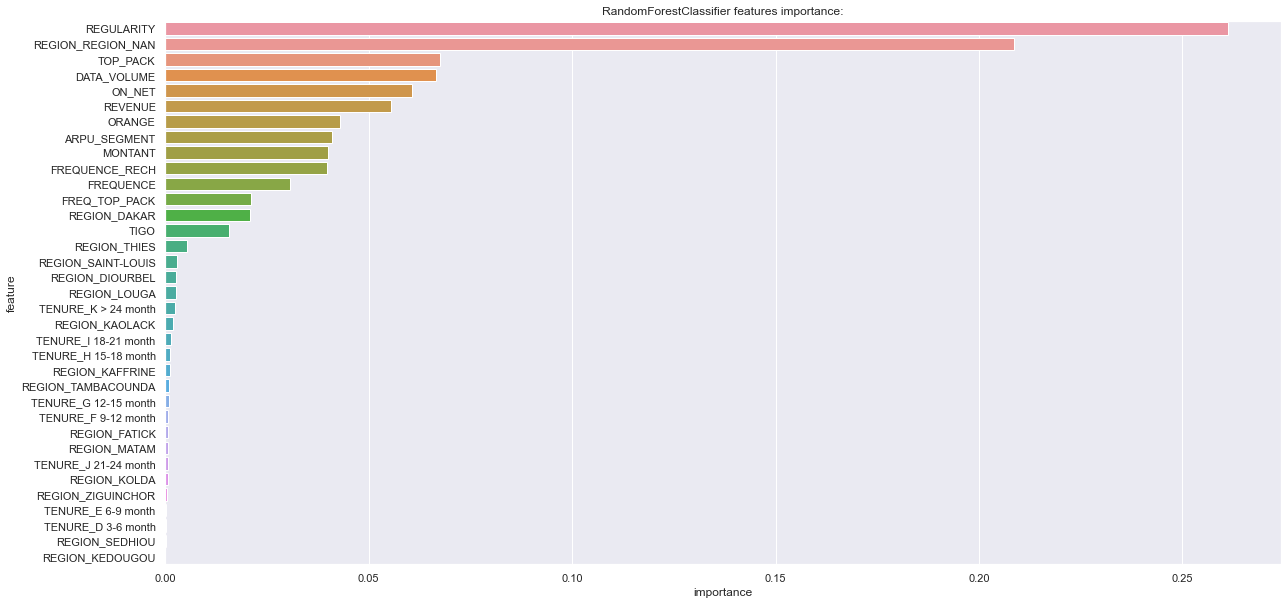

In [251]:
feature_importance_df = pd.DataFrame(random_forest.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X_train.columns #X_train

plt.figure(figsize=(20, 10))
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(35))
plt.title('RandomForestClassifier features importance:')

In [272]:
# Removal of 'FREQUENCE' due to its high correlation with 'FREQUENCE_RECH' which is a more important feature
# Removal of last 10 features with least importance
train_df_cc.drop(['FREQUENCE', 'TENURE_E 6-9 month', 'REGION_SEDHIOU', 'TENURE_D 3-6 month', 'REGION_KEDOUGOU'], axis = 1, inplace = True)
test_df_cc.drop(['FREQUENCE', 'TENURE_E 6-9 month', 'REGION_SEDHIOU', 'TENURE_D 3-6 month', 'REGION_KEDOUGOU'], axis = 1, inplace = True)


In [ ]:
train_df_cc.drop(['FREQUENCE', 'TENURE_F 9-12 month', 'REGION_MATAM', 'REGION_ZIGUINCHOR', 'TENURE_J 21-24 month', 'TENURE_E 6-9 month', 'REGION_SEDHIOU', 'TENURE_D 3-6 month', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_FATICK'], axis = 1, inplace = True)
test_df_cc.drop(['FREQUENCE', 'TENURE_F 9-12 month', 'REGION_MATAM', 'REGION_ZIGUINCHOR', 'TENURE_J 21-24 month', 'TENURE_E 6-9 month', 'REGION_SEDHIOU', 'TENURE_D 3-6 month', 'REGION_KEDOUGOU', 'REGION_KOLDA', 'REGION_FATICK'], axis = 1, inplace = True)

In [204]:
from sklearn.feature_selection import SelectFromModel

In [205]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X_train, Y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [206]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [207]:
sel_feat = X_train.columns[(sel.get_support())]
len(sel_feat)

10

In [208]:
print(sel_feat)

Index(['MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'REGULARITY', 'TOP_PACK', 'REGION_REGION_NAN'],
      dtype='object')


In [237]:
for col in train_df_copy.columns:
    if col not in sel_feat:
        train_df_copy.drop([col], axis = 1, inplace = True)
train_df_copy.columns

Index(['MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'REGULARITY', 'TOP_PACK', 'REGION_REGION_NAN'],
      dtype='object')

In [238]:
for col in test_df_copy.columns:
    if col not in sel_feat:
        test_df_copy.drop([col], axis = 1, inplace = True)
test_df_copy.columns

Index(['MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'REGULARITY', 'TOP_PACK', 'REGION_REGION_NAN'],
      dtype='object')

In [235]:
train_df.columns

Index(['MONTANT', 'REVENUE', 'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME',
       'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN', 'REGION_DAKAR', 'REGION_DIOURBEL', 'REGION_FATICK',
       'REGION_KAFFRINE', 'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month',
       'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month'],
      dtype='object')

In [254]:
train_df_copy = train_df.copy()
train_df_copy.columns.values

array(['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK', 'CHURN', 'REGION_DAKAR',
       'REGION_DIOURBEL', 'REGION_FATICK', 'REGION_KAFFRINE',
       'REGION_KAOLACK', 'REGION_KEDOUGOU', 'REGION_KOLDA',
       'REGION_LOUGA', 'REGION_MATAM', 'REGION_REGION_NAN',
       'REGION_SAINT-LOUIS', 'REGION_SEDHIOU', 'REGION_TAMBACOUNDA',
       'REGION_THIES', 'REGION_ZIGUINCHOR', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month',
       'TENURE_G 12-15 month', 'TENURE_H 15-18 month',
       'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month'], dtype=object)

In [256]:
test_df_copy = test_df.copy()

In [265]:
train_df_copied = train_df.copy()
test_df_copied = test_df.copy()

In [266]:
train_df_copied.shape

(400000, 36)

In [271]:
train_df_cc = train_df.copy()
test_df_cc = test_df.copy()